# 목차
- 스케일 조절해보기
    - cancer data
        - minmaxScaler
    - scaler를 적용해서 SVC에 적용
        - 바닐라 svm
        - minmaxscaler
        - standardscaler
        - robustscaler
        - normalizer

- 주성분 분석
    - cancer data
    - 얼굴 인식
        - knn
- NMF
    -face
    -sign separate

- Klustering
    - k-means
    - 벡터 양자화
    - 병합군집
- 군집평가
    - 얼굴 set
        - dbscan
        - k-means

# 특이사항 및 고찰
- 스케일 조절해보기
    - cancer data
        - minmaxScaler
            - 모든 스케일러는 train data를 기준으로 fit 해야함
            - transform 함수를 이용해서 변환할 수 있음
            - fit 함수에서 계산을 할 때, 따로 파라미터를 지정하지 않아도, attribute(열)를 기준으로 minmaxscale을 조절한다.
- 주성분 분석
    - cancer data
        - PCA인자로 0~1이의 값을 주면 percent기준으로 component개수 추출
        - cancer.data[cancer.target ==0] 과 같은 식으로 특정 칼럼만 추출할 수 있다.
        - set_aspect("equal")을 통해서 x축, y축 비율을 조절할 수 있다.
    - knn 얼굴인식
        - X_people =people.data[mask], bunch 객체에서 mask가 true인 것만 return해주는 함수가 정의되어 있음
        - 이미지에서는 한 픽셀만, 움직여도 다른 이미지가 될 수 도 있기 때문에 whitening을 해야 하는 것 같다.
        - pca를 복원하기위해서는 inverse_transofrm메소드를 사용함
- NMF
    - fit_transform은 fit과 transform을 함께 해준다.

- Klustering
    - k-means
    - 벡터 양자화
        - kmeans.transform을 이용해서 한 점에서 클러스터 중심과의 거리를 구할 수 있음
    - 병합군집
- 군집평가
    - 얼굴 set
        - dbscan
        - k-means

In [1]:
#스케일 조정
#cancer data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =1)

In [3]:
#data check
print(X_train.shape)
print(X_test.shape)


(426, 30)
(143, 30)


In [4]:
#Minmax scaler test
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [6]:
#데이터 변환값 확인해보기
X_train_scaled = scaler.transform(X_train)

In [7]:
print("변환 이전 값")
print(X_train[0])
print("변환 이후 값")
print(X_train_scaled[0])

변환 이전 값
[1.522e+01 3.062e+01 1.034e+02 7.169e+02 1.048e-01 2.087e-01 2.550e-01
 9.429e-02 2.128e-01 7.152e-02 2.602e-01 1.205e+00 2.362e+00 2.265e+01
 4.625e-03 4.844e-02 7.359e-02 1.608e-02 2.137e-02 6.142e-03 1.752e+01
 4.279e+01 1.287e+02 9.150e+02 1.417e-01 7.917e-01 1.170e+00 2.356e-01
 4.089e-01 1.409e-01]
변환 이후 값
[0.389938   0.70713561 0.4119273  0.24322375 0.4709759  0.70821487
 0.59746954 0.46863817 0.53939394 0.46758954 0.05254379 0.18670438
 0.0756255  0.02960041 0.09899038 0.34689218 0.18583333 0.30460314
 0.22786541 0.18128049 0.34115973 0.82009595 0.38990986 0.17936492
 0.46575976 0.83944828 1.         0.80962199 0.59957224 0.91755006]


In [8]:
print("변환 이전 값")
print(X_train[1])
print("변환 이후 값")
print(X_train_scaled[1])

변환 이전 값
[1.496e+01 1.910e+01 9.703e+01 6.873e+02 8.992e-02 9.823e-02 5.940e-02
 4.819e-02 1.879e-01 5.852e-02 2.877e-01 9.480e-01 2.171e+00 2.487e+01
 5.332e-03 2.115e-02 1.536e-02 1.187e-02 1.522e-02 2.815e-03 1.625e+01
 2.619e+01 1.091e+02 8.098e+02 1.313e-01 3.030e-01 1.804e-01 1.489e-01
 2.962e-01 8.472e-02]
변환 이후 값
[0.37763264 0.31755157 0.36790823 0.23066808 0.3366435  0.29496484
 0.13917526 0.23951292 0.41363636 0.18193804 0.06251586 0.12990629
 0.06662583 0.03374686 0.1230241  0.14193229 0.03878788 0.22485319
 0.10941623 0.06633915 0.29598008 0.37766525 0.29229543 0.15350963
 0.39708116 0.30277506 0.15418803 0.51168385 0.33174905 0.31598672]


In [9]:
print("변환 이전 값")
print(X_train[2])
print("변환 이후 값")
print(X_train_scaled[2])

변환 이전 값
[1.468e+01 2.013e+01 9.474e+01 6.845e+02 9.867e-02 7.200e-02 7.395e-02
 5.259e-02 1.586e-01 5.922e-02 4.727e-01 1.240e+00 3.195e+00 4.540e+01
 5.718e-03 1.162e-02 1.998e-02 1.109e-02 1.410e-02 2.085e-03 1.907e+01
 3.088e+01 1.234e+02 1.138e+03 1.464e-01 1.871e-01 2.914e-01 1.609e-01
 3.029e-01 8.216e-02]
변환 이후 값
[0.36438071 0.35238417 0.35208348 0.22948038 0.415636   0.19684274
 0.17326617 0.26138171 0.26565657 0.19731927 0.12960075 0.19443953
 0.11487537 0.07209216 0.13614577 0.0703578  0.05045455 0.21007767
 0.087845   0.04111908 0.39630025 0.50266525 0.36351412 0.23417224
 0.4967972  0.17549774 0.24905983 0.55292096 0.3476711  0.28857479]


In [10]:
print("조정 전 특성별 최소값: \n", X_train.min(axis=0))
print("조정 전 특성별 최대값: \n", X_train.max(axis=0))
print("조정 후 특성별 최소값: \n", X_train_scaled.min(axis=0))
print("조정 후 특성별 최대값: \n", X_train_scaled.max(axis=0))

조정 전 특성별 최소값: 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
조정 전 특성별 최대값: 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
조정 후 특성별 최소값: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
조정 후 특성별 최대값: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
#test data transform
X_test_scaled = scaler.transform(X_test)

print("조정 전 특성별 최소값: \n", X_test.min(axis=0))
print("조정 전 특성별 최대값: \n", X_test.max(axis=0))
print("조정 후 특성별 최소값: \n", X_test_scaled.min(axis=0))
print("조정 후 특성별 최대값: \n", X_test_scaled.max(axis=0))

조정 전 특성별 최소값: 
 [7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
조정 전 특성별 최대값: 
 [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
조정 후 특성별 최소값: 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.0002

In [12]:
# svc적용
from sklearn.svm import SVC
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state =1)


In [13]:
#바닐라 SVM
svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도: 0.62


In [14]:
# minmaxscaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [15]:
# standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [16]:
# robustscaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [17]:
# normalizer
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.90


In [18]:
# 주성분 분석
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

# 처음 두 개 주성분만 유지
pca = PCA(n_components= 2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태: {}".format(str(X_pca.shape)))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


In [19]:
#라이브러리 import
from sklearn.datasets import make_blobs
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from preamble import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


%matplotlib inline

In [20]:
#맥에서 폰트문제 해결하기
from matplotlib import rc
rc('font', family="AppleGothic")

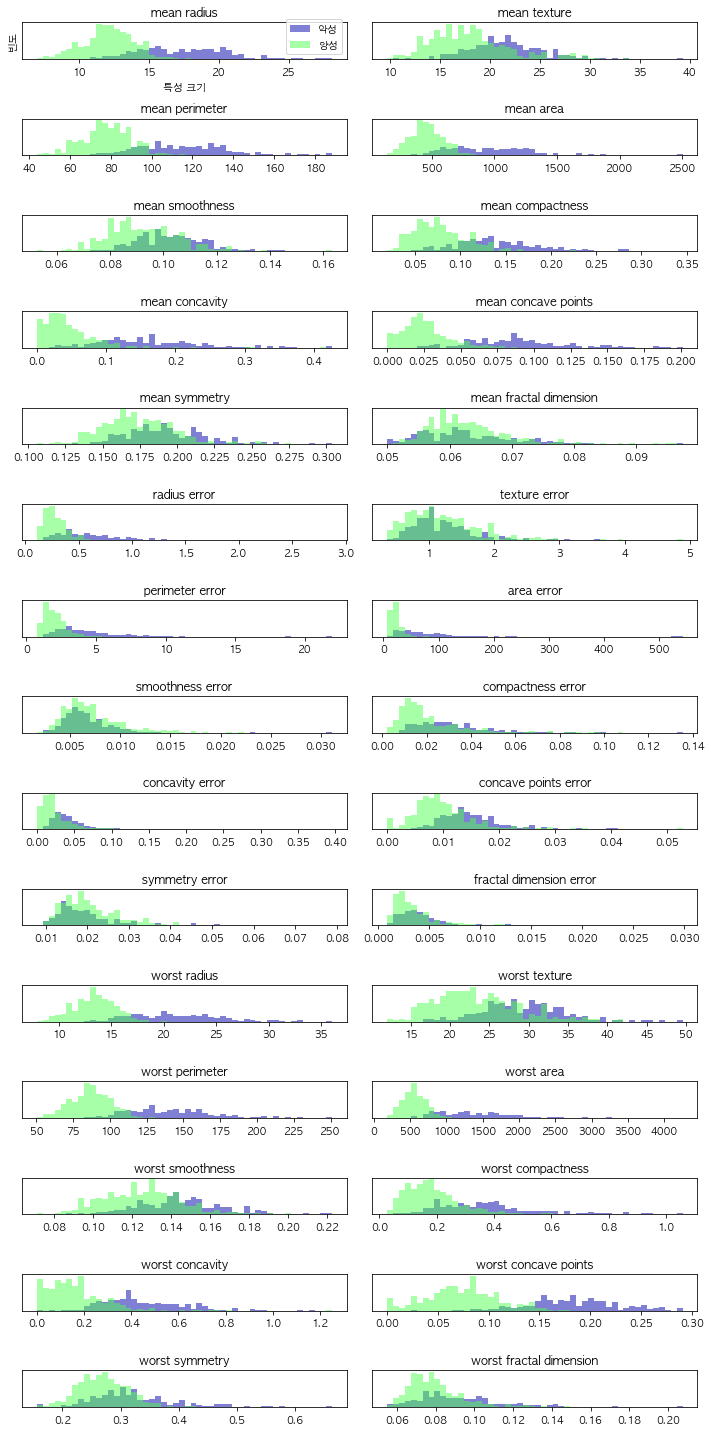

In [21]:
fig, axes = plt.subplots(15, 2, figsize=(10,20))
malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:,i],bins=50) #bin 막대의 영역을 결정함
    ax[i].hist(malignant[:,i],bins = bins, color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:,i],bins = bins, color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성","양성"],loc ="best")
fig.tight_layout()


Text(0, 0.5, '두 번째 주성분')

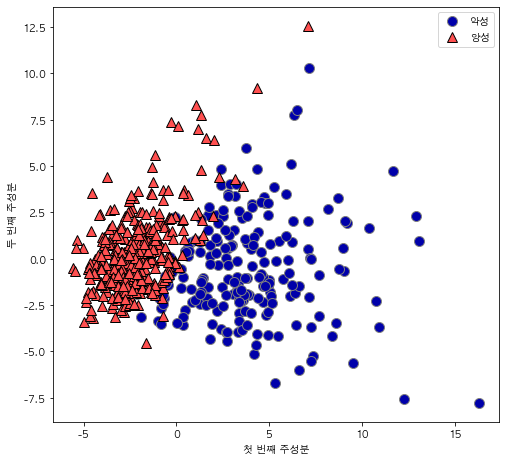

In [22]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],cancer.target)
plt.legend(["악성","양성"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

In [23]:
#사람얼굴 knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_lfw_people

In [24]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
print("people.image.shape: ", people.images.shape)
print("클래스 개수: ", len(people.target_names))

people.image.shape:  (3023, 87, 65)
클래스 개수:  62


In [25]:
#50개의 이미지만 선택, 부시 이미지에 편중 될 수 있기 때문에
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][0:50]]=1

X_people =people.data[mask]
y_people = people.target[mask]
X_people = X_people/255.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state = 0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수:{:.2f}".format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수:0.23


In [27]:
#whitening이 된 pca, pc = 100적용
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("X_test_pca.shape: {}".format(X_test_pca.shape))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("테스트 세트 정확도: {:.2f}".format(knn.score(X_test_pca,y_test)))



X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)
테스트 세트 정확도: 0.31


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


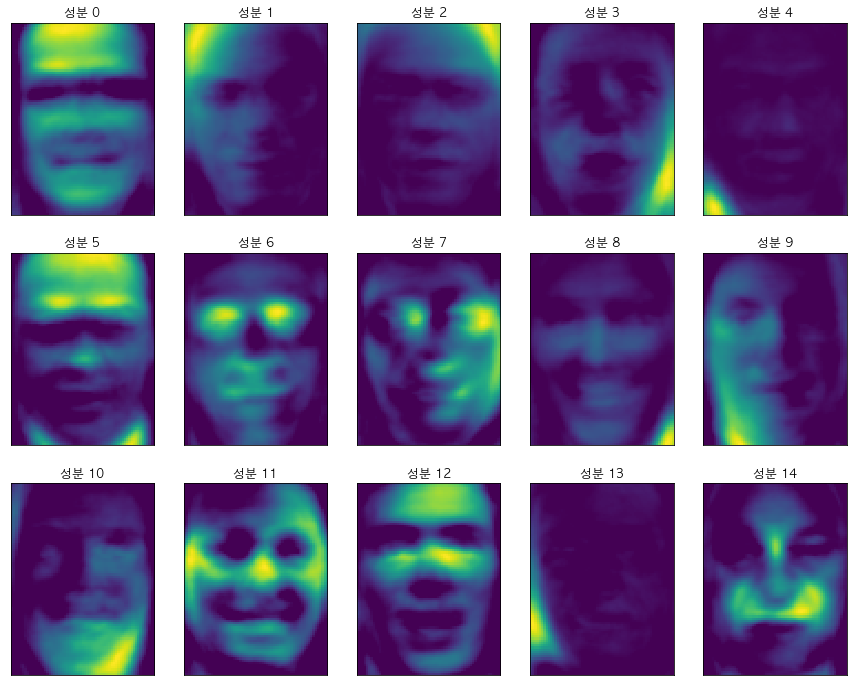

In [28]:
#NMF, 얼굴 사진 분석
from sklearn.decomposition import NMF

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

image_shape = people.images[0].shape

fig, axes =plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

Text(0, 0.5, '신호')

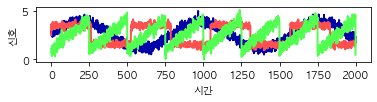

In [29]:
# sing seperate
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("시간")
plt.ylabel("신호")

In [30]:
S.shape

(2000, 3)

In [31]:
#원본 데이터를 사용해 100개의 측정 데이터 만듦

A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print("측정 데이터 형태: ", X.shape)

측정 데이터 형태:  (2000, 100)


In [32]:
nmf = NMF(n_components=3, random_state =42)
S_ =nmf.fit_transform(X)
print("복원한 신호데이터",S_.shape)

복원한 신호데이터 (2000, 3)


/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/Users/sinjaeug/anaconda3/envs/mllecture/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


In [33]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

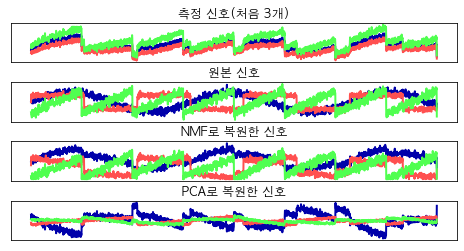

In [34]:
models =[X,S,S_,H]
names =["측정 신호(처음 3개)",'원본 신호','NMF로 복원한 신호', "PCA로 복원한 신호"]

fig, axes = plt.subplots(4,figsize=(8,4), gridspec_kw={'hspace':.5},subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

In [35]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [36]:
X,y = make_blobs(random_state =1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [37]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


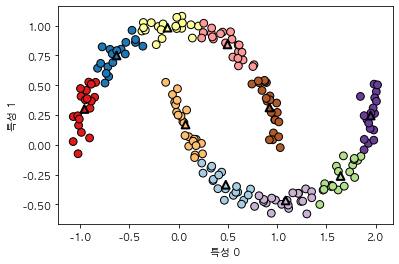

In [38]:
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c = y_pred, s =60, cmap="Paired", edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60, marker='^', c=range(kmeans.n_clusters),linewidths=2,cmap="Paired",edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

In [39]:
distance_features = kmeans.transform(X)
print("클러스터 거리 데이터의 형태: ", distance_features.shape)
print("클러스터 거리 데이터의 거리: \n", distance_features)


클러스터 거리 데이터의 형태:  (200, 10)
클러스터 거리 데이터의 거리: 
 [[0.922 1.466 1.14  ... 1.166 1.039 0.233]
 [1.142 2.517 0.12  ... 0.707 2.204 0.983]
 [0.788 0.774 1.749 ... 1.971 0.716 0.944]
 ...
 [0.446 1.106 1.49  ... 1.791 1.032 0.812]
 [1.39  0.798 1.981 ... 1.978 0.239 1.058]
 [1.149 2.454 0.045 ... 0.572 2.113 0.882]]


In [40]:
# 병합군집
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, '특성 1')

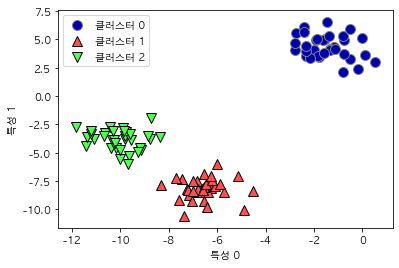

In [41]:
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assigment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assigment)
plt.legend(["클러스터 0","클러스터 1", "클러스터 2"],loc ="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [42]:
#덴드로그램으로 군집모양 확인
from scipy.cluster.hierarchy import dendrogram, ward

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125]],
 'dcoord': [[0.0, 0.3320945047164902, 0.3320945047164902, 0.0],
  [0.0, 0.9268322277319817, 0.9268322277319817, 0.0],
  [0.0, 1.6004181164464242, 1.6004181164464242, 0.9268322277319817],
  [0.3320945047164902,
   2.078157949404743,
   2.078157949404743,
   1.6004181164464242],
  [0.0, 1.1803786988620995, 1.1803786988620995, 0.0],
  [0.0, 1.3031157463723073, 1.3031157463723073, 1.1803786988620995],
  [0.0, 0.6458019336639491, 0.6458019336639491, 0.0],
  [0.0, 1.4440338959892802, 1.4440338959892802, 0.6458019336639491],
  [0.0, 2.1598188624745154, 2.1598188624745154, 1.4440338959892802],
  [1.3031157463723073,
   6.550248535823649,
   6.550248535823649,
   2.15

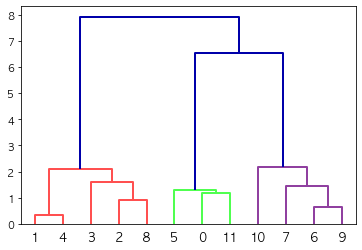

In [43]:
X,y = make_blobs(random_state =0, n_samples=12)
linkage_array =ward(X)
dendrogram(linkage_array)

In [44]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for algorithm in algorithms:
    clusters = algorithm.fit_predict(X_scaled)
    print("{} ARI score{:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y,clusters)))

KMeans ARI score0.50
AgglomerativeClustering ARI score0.61
DBSCAN ARI score1.00


In [45]:
# 얼굴 데이터셋으로 군집알고리즘 비교
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten= True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [46]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유 테이블", np.unique(labels))

고유 테이블 [-1]


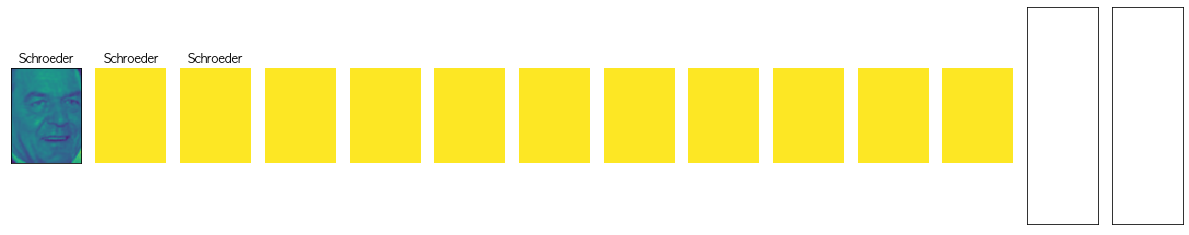

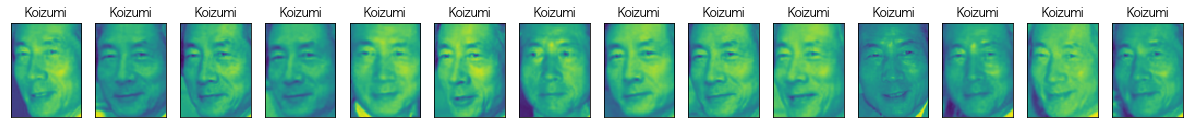

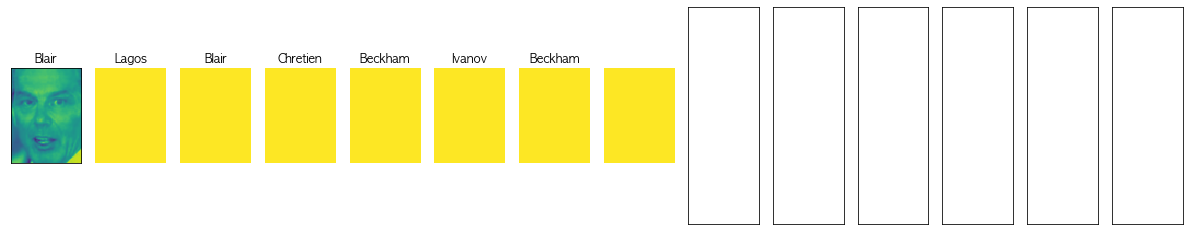

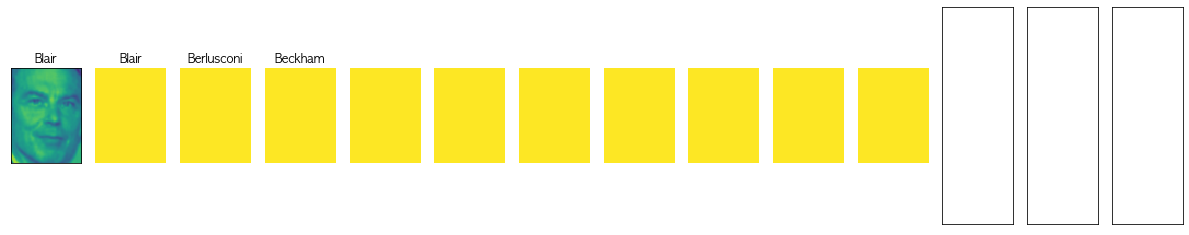

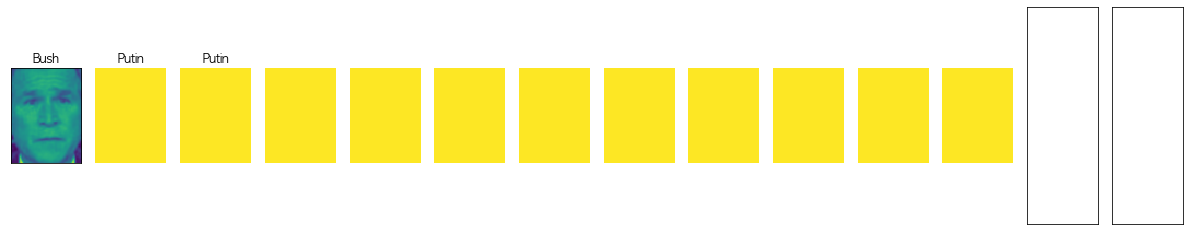

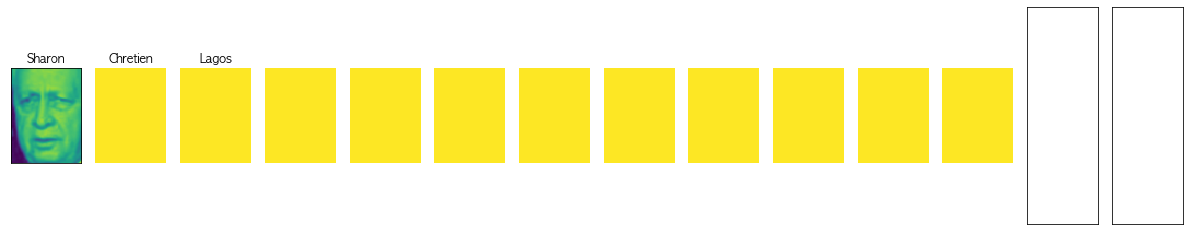

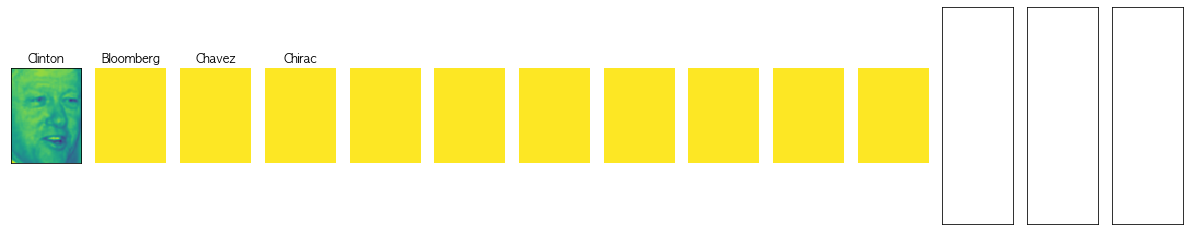

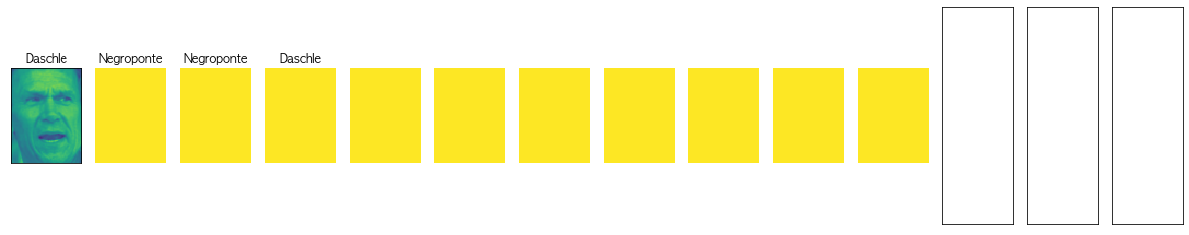

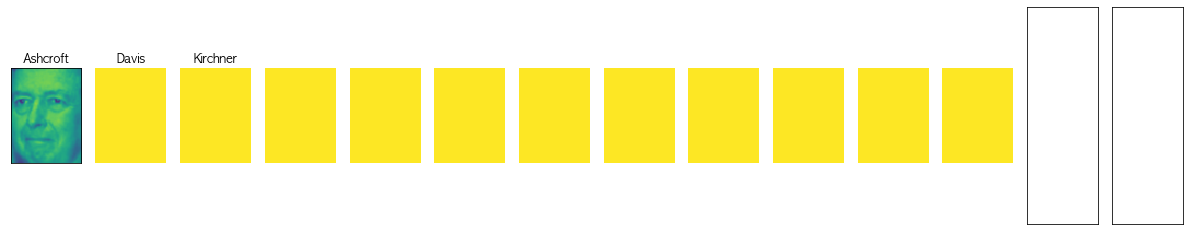

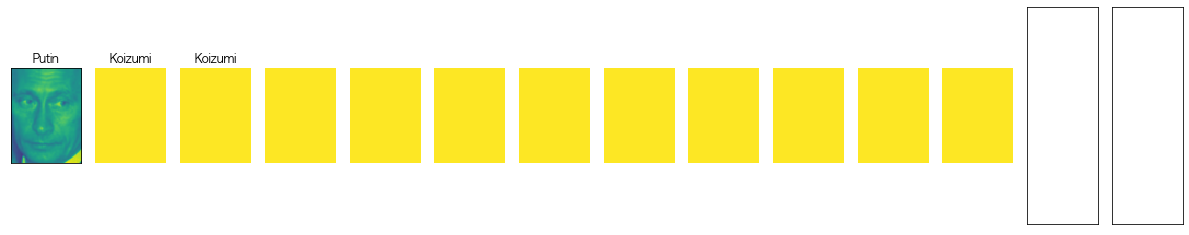

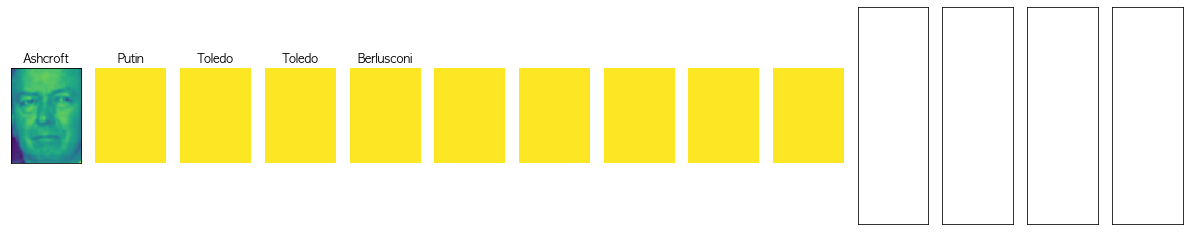

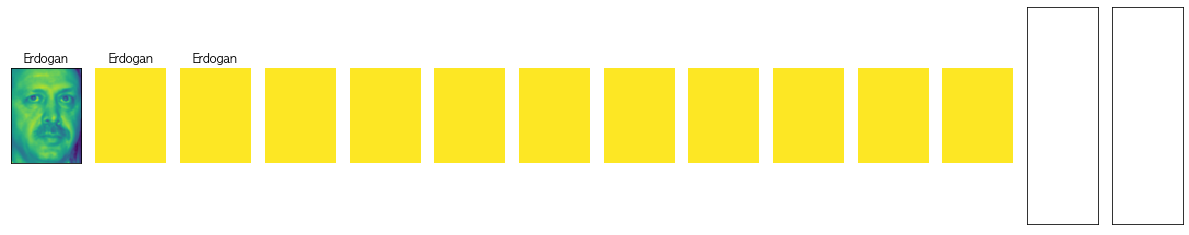

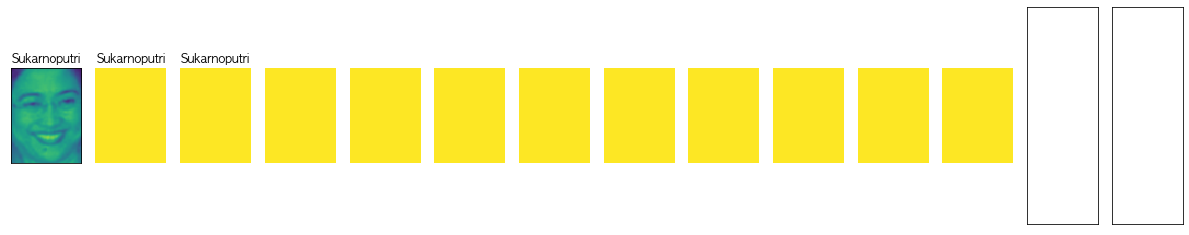

In [47]:
dbscan = DBSCAN(min_samples=3, eps =7)
labels =dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4), subplot_kw = {'xticks':(),'yticks':()})
    
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i +=1
        
    for j in range(len(axes) - i):
        axes[j+1].imshow(np.array([[1]*65]*87),vmin=0,vmax=1)
        axes[j+1].axis('off')

In [48]:
km = KMeans(n_clusters=10, random_state=0)
labels_km =km.fit_predict(X_pca)
print("k-평균의 클러스터 크기:", np.bincount(labels_km))

k-평균의 클러스터 크기: [155 175 238  75 358 257  91 219 323 172]


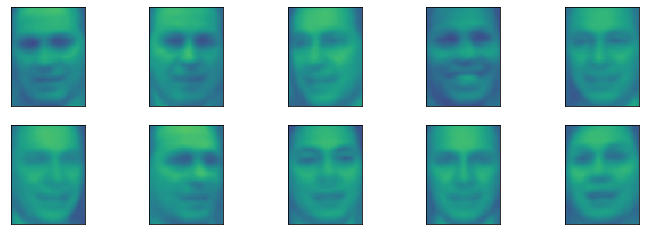

In [49]:
fig, axes = plt.subplots(2,5 , subplot_kw={'xticks':(), 'yticks':()},figsize=(12,4))

for center, ax in zip(km.cluster_centers_,axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)